In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd

mitbih_train = pd.read_csv('mitbih_train.csv', sep=',', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', sep=',', header=None)

mitbih_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# creating column headers
column_headers = [f'x{serial+1}'for serial in range(187)]
column_headers.append('label')
len(column_headers)

188

In [4]:
mitbih_train.columns = column_headers
mitbih_test.columns = column_headers

In [5]:
# sanity check
print(mitbih_train.head())
print(mitbih_test.head())

         x1        x2        x3        x4        x5        x6        x7  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

         x8        x9       x10  ...  x179  x180  x181  x182  x183  x184  \
0  0.085784  0.058824  0.049020  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.088319  0.074074  0.082621  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.043243  0.054054  0.045946  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.060773  0.066298  0.058011  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.089202  0.117371  0.150235  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   x185  x186  x187  label  
0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0    0.0  
2   0

In [6]:
# shape of the dataframes
print(mitbih_train.shape)
print(mitbih_test.shape)

(87554, 188)
(21892, 188)


## Data Exploration, Imputation and Visualization

In [7]:
def get_null_cols(df):
  """
  Args:
    df: dataframe to work on
  returns:
    list of column names with null values
  """
  return df.columns[df.isna().any()].tolist()

In [8]:
def plot_bar_plot(x, y):
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(x, y, color ='blue',
        width = 0.4)
 
    plt.xlabel("Beat Types")
    plt.ylabel("No. Each Type")
    plt.title("Value Counts of Beat Types")
    plt.show()

In [9]:
def plot_confusion_matrices(y_test, y_predicted):
    # visualize the confusion matrix
    cm = confusion_matrix(y_test, y_predicted)
    cm_df = pd.DataFrame(cm,
                         index = ['0','1','2','3','4'], 
                         columns = ['0','1','2','3','4'])

    #Plotting the confusion matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [33]:
def compute_metrices(y_test, y_predicted):
    
    # compute the accuracy
    print('Accuracy:',accuracy_score(y_test, y_predicted))
    
    # compute precision, recall and F1 score
    precision, recall, F1, _  = precision_recall_fscore_support(y_test, y_predicted,average='weighted')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {F1}')

In [10]:
mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, x1 to label
dtypes: float64(188)
memory usage: 125.6 MB


In [11]:
print(mitbih_train.isna().sum())
print(mitbih_test.isna().sum())

x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x184     0
x185     0
x186     0
x187     0
label    0
Length: 188, dtype: int64
x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x184     0
x185     0
x186     0
x187     0
label    0
Length: 188, dtype: int64


In [12]:
types_train = mitbih_train['label'].value_counts().index.tolist()
counts_train = mitbih_train['label'].value_counts().tolist()

In [13]:
mitbih_train['label'].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64

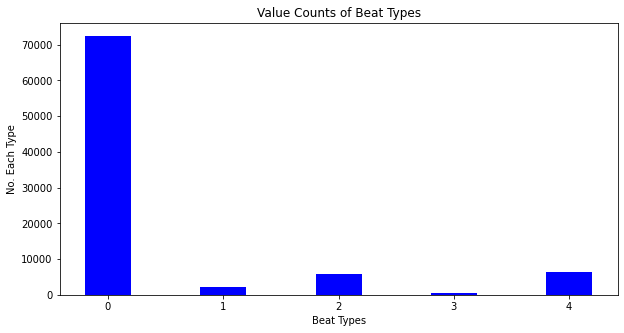

In [14]:
plot_bar_plot(types_train, counts_train)

In [15]:
types_test = mitbih_test['label'].value_counts().index.tolist()
counts_test = mitbih_test['label'].value_counts().tolist()

In [16]:
mitbih_test['label'].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: label, dtype: int64

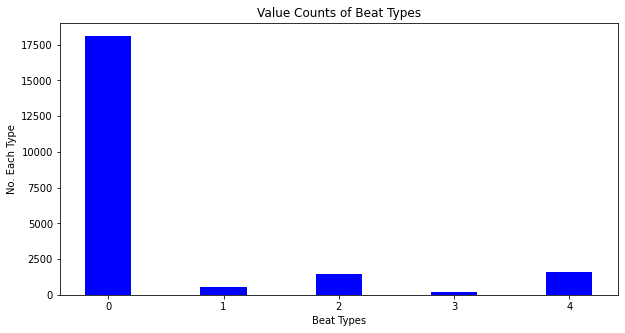

In [17]:
plot_bar_plot(types_test, counts_test)

We can see there are severe imbalaneces between the beat types. As per observed, there are more examples of beat type 0 than any other typse in both the training and the testing set. In both the training and the test set, the beat types 1 and 3 are extremely low and the beat type 2 and 4 are somewhat low. So in both the train and the test set, the classes are imbalanced.

In [18]:
# getting the null values column names from the data frames
train_null_cols = get_null_cols(mitbih_train)
test_null_cols = get_null_cols(mitbih_test)

In [19]:
# removing label column from the null-valued columns
try:
  train_null_cols.remove('label')
  test_null_cols.remove('label')
except:
  print('One has no null columns')

One has no null columns


In [20]:
mitbih_train.dropna(subset=['label'], inplace=True)

In [21]:
mitbih_test['label'].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: label, dtype: int64

In [22]:
X_train = mitbih_train.iloc[:,0:mitbih_train.shape[1]-1]
y_train = mitbih_train.iloc[:,mitbih_train.shape[1]-1]

print(X_train.shape)
print(y_train.value_counts())

(87554, 187)
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64


In [23]:
X_test = mitbih_test.iloc[:,0:mitbih_test.shape[1]-1]
y_test = mitbih_test.iloc[:,mitbih_test.shape[1]-1]

print(X_test.shape)
print(y_test.shape)

(21892, 187)
(21892,)


## Training, Testing and Evaluation Models

In [24]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model = LogisticRegression()
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.9089715  0.91422534 0.91405402 0.91045628 0.91496288]
0.9125340067714964


Accuracy: 0.91174858395761
Precision: 0.9006559322267144
Recall: 0.91174858395761
F1-Score: 0.8992060117007737


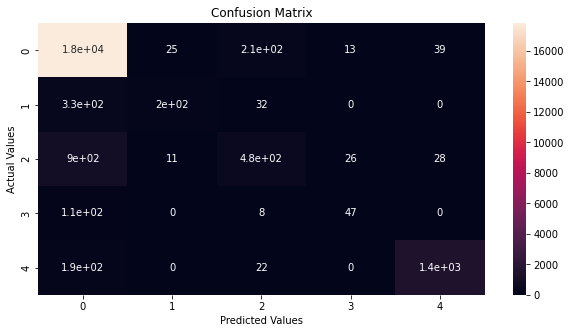

In [34]:
# train the classifier and evaluate the performance in the test set
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)

# computing the metrices
compute_metrices(y_test, y_predicted)

# plot confusion matrices
plot_confusion_matrices(y_test, y_predicted)

As we can see that there are quite some mispredictions. It is severe in class 3 as the model was able to only predict 47 entries correctly. we take note of the F1-score here, as it is the harominic weight of both precision and recall. Also for class 0,1,2 there are lot's of mispredictions too. We can try the SVM to see difference next. 

Accuracy: 0.9680248492600037
Precision: 0.9675831181181114
Recall: 0.9680248492600037
F1-Score: 0.9657306309108418


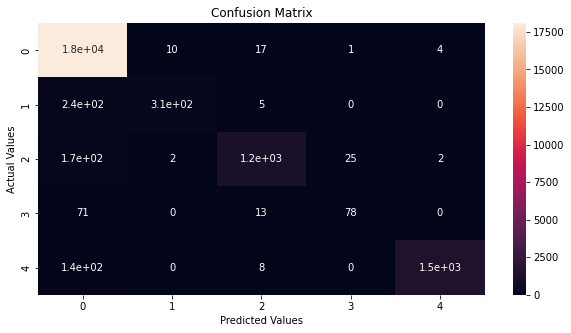

In [35]:
# check performance for support vector machine
model = SVC(kernel='rbf') # SVC(kernel='linear') #
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)

# computing the metrices
compute_metrices(y_test, y_predicted)

# plot confusion matrices
plot_confusion_matrices(y_test, y_predicted)

As we see that the accuracy is a bit higher than the linaer logisitic regression classifier. Here the third class is predicted a little bit better, than the previous model. Also we see drastic improvements for the class 0 and 1 as well. But for class 2 we see some downfall as it mispredicted some labels. Next wee see the use of Linear SVM. Here we also note that the F1-Score is better than the logistic regression classifier.

Accuracy: 0.9204275534441805
Precision: 0.9158481402163346
Recall: 0.9204275534441805
F1-Score: 0.9054528811250788


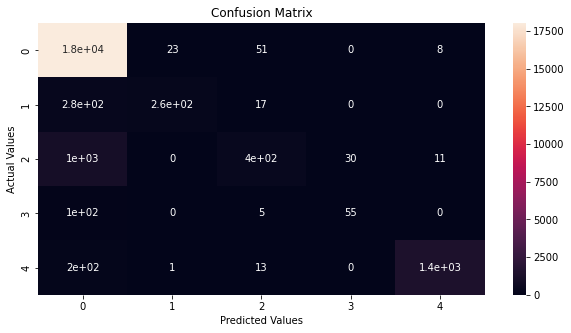

In [37]:
# check performance for support vector machine
model = SVC(kernel='linear') # SVC(kernel='linear') #
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)

# computing the metrices
compute_metrices(y_test, y_predicted)

# plot confusion matrices
plot_confusion_matrices(y_test, y_predicted)

Here we observe some interesting things as well. The performance is somehwhat worse than the rbf kernel of svm for some classes. We observe that however for class 2, the result is better than rbf kernel. Next we try some ensemble methods and check out their performance. We also see that the F1-Score is drastically reduced as well.

So Among the three classifiers tested above, it seems overall **rbf kernel svm** performs better than the other two.

Accuracy: 0.9745112369815457
Precision: 0.9745440294791335
Recall: 0.9745112369815457
F1-Score: 0.972832063243754


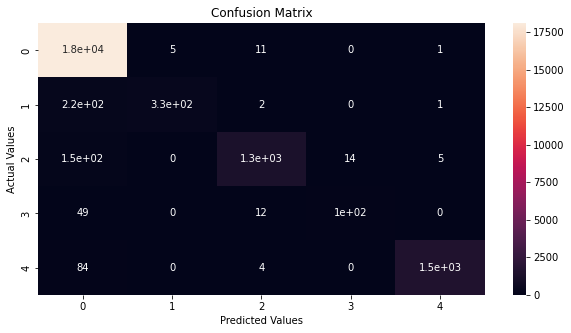

In [48]:
# check performance for ensemble models
model = RandomForestClassifier() #RandomForestClassifier()
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)

# computing the metrices
compute_metrices(y_test, y_predicted)

# plot confusion matrices
plot_confusion_matrices(y_test, y_predicted)

For ensemble method we choose RandomForestClassifier. Here we see some interesting result. We notice that the F1-score is the highest among all the classifier we have encountered so far. For the first time among all the models, we have that the class 3 is predicted properly in more numbers (the (4,4)th entry in the matrix ). We also see drastic improvements for other classifiers as well. So Among the classifiers we have tested, this one outperforms all the previous ones for this classification problem. 

## Feature Identification

In [46]:
# First we merge the train and test dataframes
concat_df = pd.concat([mitbih_train, mitbih_test])


concat_df_X = concat_df.iloc[:,0:concat_df.shape[1]-1]
concat_df_Y = concat_df.iloc[:,concat_df.shape[1]-1]

print(concat_df.shape)
print(concat_df_X.shape)
print(concat_df_Y.shape)

(109446, 188)
(109446, 187)
(109446,)


In [ ]:
# what are the important features??
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
model_rf = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=model_rf,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(concat_df_X, concat_df_Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()